In [2]:
import numpy as np
file_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\development_scenes\2_speech_true_Ofen_aus.npy"
file_path1 = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\development_scenes\3_speech_true_Radio_an.npy"
file_np = np.load(file_path)
np.shape(file_np)

(175, 581)

In [3]:
file_np1 = np.load(file_path1)
np.shape(file_np1)

development_scenes_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\development_scenes"
annotations_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\development_scene_annotations.csv"
development_scenes_csv = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\development_scenes.csv"


(175, 1109)

In [14]:
import pandas as pd
import numpy as np
import os

# Define file paths
development_scenes_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\development_scenes"
annotations_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\development_scene_annotations.csv"
development_scenes_csv = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\development_scenes.csv"


# Load CSV files
annotations = pd.read_csv(annotations_path)
development_scenes = pd.read_csv(development_scenes_csv)



In [15]:
max_length = 0

for index, row in annotations.iterrows():
    file_path = os.path.join(development_scenes_path, f"{row['filename']}.npy")
    if os.path.exists(file_path):
        data = np.load(file_path)
        if data.shape[1] > max_length:
            max_length = data.shape[1]

print(f"Maximum length of feature arrays: {max_length}")


Maximum length of feature arrays: 1437


In [16]:
from sklearn.preprocessing import StandardScaler

features = []
labels = []

# Extract features and labels with padding
for index, row in annotations.iterrows():
    file_path = os.path.join(development_scenes_path, f"{row['filename']}.npy")
    if os.path.exists(file_path):
        data = np.load(file_path)
        padded_data = np.pad(data, ((0, 0), (0, max_length - data.shape[1])), mode='constant')
        features.append(padded_data.flatten())  # Flatten the padded 2D array to 1D
        labels.append(row['command'])

features = np.array(features)
labels = np.array(labels)

# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")


Features shape: (1190, 251475)
Labels shape: (1190,)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))


                 precision    recall  f1-score   support

       Alarm an       0.06      0.06      0.06        17
      Alarm aus       0.00      0.00      0.00        14
   Fernseher an       0.07      0.04      0.05        23
  Fernseher aus       0.00      0.00      0.00        12
     Heizung an       0.03      0.09      0.04        11
    Heizung aus       0.05      0.06      0.06        16
       Licht an       0.00      0.00      0.00        22
      Licht aus       0.05      0.11      0.07        19
     Lüftung an       0.00      0.00      0.00        13
    Lüftung aus       0.00      0.00      0.00        17
        Ofen an       0.00      0.00      0.00         9
       Ofen aus       0.00      0.00      0.00        10
       Radio an       0.00      0.00      0.00        11
      Radio aus       0.06      0.06      0.06        17
 Staubsauger an       0.00      0.00      0.00        16
Staubsauger aus       0.00      0.00      0.00        11

       accuracy              

In [19]:
y_pred = clf.predict(X_val)
print(y_pred)

['Heizung aus' 'Radio aus' 'Fernseher aus' 'Ofen aus' 'Ofen an'
 'Heizung an' 'Alarm an' 'Staubsauger an' 'Heizung an' 'Heizung an'
 'Staubsauger aus' 'Heizung an' 'Heizung an' 'Licht aus' 'Fernseher an'
 'Radio aus' 'Heizung an' 'Alarm aus' 'Lüftung an' 'Heizung aus'
 'Radio aus' 'Licht aus' 'Alarm an' 'Staubsauger aus' 'Radio aus'
 'Licht aus' 'Licht an' 'Alarm an' 'Fernseher an' 'Lüftung an' 'Licht aus'
 'Lüftung aus' 'Heizung an' 'Radio an' 'Heizung aus' 'Licht aus'
 'Heizung an' 'Heizung aus' 'Heizung an' 'Licht an' 'Lüftung an'
 'Heizung aus' 'Heizung an' 'Licht aus' 'Alarm an' 'Radio an' 'Radio an'
 'Radio an' 'Alarm an' 'Licht aus' 'Licht aus' 'Fernseher an'
 'Fernseher an' 'Ofen aus' 'Radio an' 'Ofen an' 'Licht an'
 'Staubsauger aus' 'Fernseher an' 'Radio aus' 'Alarm aus' 'Licht aus'
 'Alarm an' 'Heizung an' 'Staubsauger an' 'Heizung aus' 'Heizung an'
 'Licht aus' 'Licht aus' 'Fernseher aus' 'Heizung an' 'Heizung aus'
 'Licht aus' 'Lüftung aus' 'Lüftung aus' 'Radio an' 'Staubs

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load dataset
dataset_path = r'C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\new_df1.4.csv'
df = pd.read_csv(dataset_path, index_col=0)

X = df.drop(columns=['label']).values
y = df['label'].values

# Label encoding and one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data to fit the CNN + LSTM model (batch_size, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y_onehot, test_size=0.2, stratify=y_onehot, random_state=42)

print(f"Shape X_train: {X_train.shape}, Shape y_train: {y_train.shape}")
print(f"Shape X_valid: {X_valid.shape}, Shape y_valid: {y_valid.shape}")


Shape X_train: (1594419, 174, 1), Shape y_train: (1594419, 21)
Shape X_valid: (398605, 174, 1), Shape y_valid: (398605, 21)


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_onehot.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 172, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 86, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 86, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 84, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 42, 64)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 42, 64)            0

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, LeakyReLU, Flatten, Dense, Dropout, Activation

model = Sequential()

# Add the first convolution layer
model.add(Conv1D(6, kernel_size=5, strides=1, padding='valid', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

# Add the second convolution layer
model.add(Conv1D(16, kernel_size=5, strides=1, padding='valid'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

# # Add the second convolution layer
# model.add(Conv1D(32, kernel_size=5, strides=1, padding='valid'))
# model.add(BatchNormalization())
# model.add(LeakyReLU())
# model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))

# Flatten the output
model.add(Flatten())

# Add dropout
model.add(Dropout(0.2))

# Add the final dense layer
model.add(Dense(16, activation='linear'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(y_onehot.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 170, 6)            36        
                                                                 
 batch_normalization (BatchN  (None, 170, 6)           24        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 170, 6)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 85, 6)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 16)            496       
                                                                 
 batch_normalization_1 (Batc  (None, 81, 16)           6

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Flatten, Dense, Dropout

def create_vggish_model(input_shape, num_classes):
    model = Sequential()

    # VGGish architecture
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv1D(128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv1D(256, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    model.add(Conv1D(512, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))

    # Flatten before Dense layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

input_shape = (X_train.shape[1], X_train.shape[2])
num_classes = y_onehot.shape[1]
model = create_vggish_model(input_shape, num_classes)
model.summary()



#The working model!!! improved_cnn_model.keras 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 172, 64)           256       
                                                                 
 batch_normalization (BatchN  (None, 172, 64)          256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 86, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 86, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 84, 128)           24704     
                                                                 
 batch_normalization_1 (Batc  (None, 84, 128)          5

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_valid, y_valid), verbose=1)

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")

valid_loss, valid_accuracy = model.evaluate(X_valid, y_valid, verbose=0)
print(f"Validation Accuracy: {valid_accuracy*100:.2f}%")

model_path = 'improved_cnn_model.keras'
model.save(model_path)
print("Model saved successfully.")

# Predicting and evaluating the model
pred_probs = model.predict(X_valid)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_valid, axis=1)

valid_accuracy = np.mean(pred_labels == true_labels)
print(f"Validation Accuracy: {valid_accuracy*100:.2f}%")

from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_labels, target_names=label_encoder.classes_))



Epoch 1/200
24913/24913 [==============================] - 196s 8ms/step - loss: 2.5517 - accuracy: 0.2007 - val_loss: 2.0626 - val_accuracy: 0.3443
Epoch 2/200
24913/24913 [==============================] - 197s 8ms/step - loss: 2.1298 - accuracy: 0.3240 - val_loss: 1.7928 - val_accuracy: 0.4209
Epoch 3/200
24913/24913 [==============================] - 198s 8ms/step - loss: 1.9825 - accuracy: 0.3680 - val_loss: 1.7289 - val_accuracy: 0.4384
Epoch 4/200
24913/24913 [==============================] - 199s 8ms/step - loss: 1.9252 - accuracy: 0.3850 - val_loss: 1.6784 - val_accuracy: 0.4539
Epoch 5/200
24913/24913 [==============================] - 196s 8ms/step - loss: 1.8905 - accuracy: 0.3952 - val_loss: 1.6554 - val_accuracy: 0.4598
Epoch 6/200
24913/24913 [==============================] - 198s 8ms/step - loss: 1.8672 - accuracy: 0.4012 - val_loss: 1.6543 - val_accuracy: 0.4647
Epoch 7/200
24913/24913 [==============================] - 197s 8ms/step - loss: 1.8517 - accuracy: 0.4060

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 172, 64)           256       
                                                                 
 batch_normalization (BatchN  (None, 172, 64)          256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 86, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 86, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 84, 128)           24704     


                                                                 
 batch_normalization_1 (Batc  (None, 84, 128)          512       
 hNormalization)                                                 
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 42, 128)          0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 42, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 40, 256)           98560     
                                                                 
 batch_normalization_2 (Batc  (None, 40, 256)          1024      
 hNormalization)                                                 
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 20, 256)          0         
 1D)      

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load a full-length track (example)
full_length_track_path = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\development_scenes\development_scenes\30_speech_false_Heizung_aus_Licht_an.npy"
full_length_track = np.load(full_length_track_path)
np.shape(full_length_track)
transposed = np.transpose(full_length_track)
transposed  

array([[0.00000000e+00, 0.00000000e+00, 7.28412912e+00, ...,
        0.00000000e+00, 8.00000000e+03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.28412912e+00, ...,
        0.00000000e+00, 8.00000000e+03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.28412912e+00, ...,
        0.00000000e+00, 8.00000000e+03, 0.00000000e+00],
       ...,
       [3.16805989e+03, 2.50288248e+03, 4.94300705e+00, ...,
        1.37187610e-03, 1.99695370e+02, 2.52500000e-01],
       [3.18224109e+03, 2.49392570e+03, 1.04287240e+00, ...,
        9.47922817e-04, 1.00384220e+02, 2.07500000e-01],
       [3.28860068e+03, 2.73615666e+03, 4.13108962e+00, ...,
        1.45448535e-03, 1.06471595e+02, 2.50000000e-01]])

ValueError: x and y must have same first dimension, but have shapes (581,) and (175,)

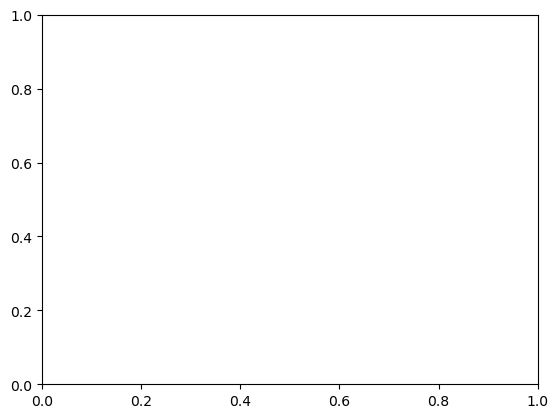

In [4]:
import matplotlib.pyplot as plt


plt.plot(transposed[:,0], transposed[0,:])
plt.show()

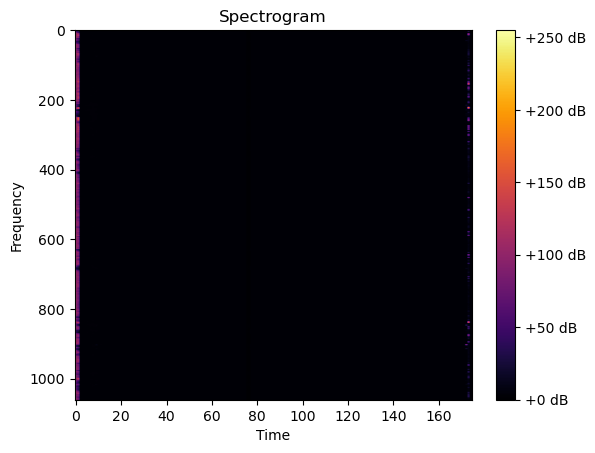

In [11]:
import matplotlib.pyplot as plt
import cv2
# Normalize the data to the range 0-255
spectrogram_normalized = cv2.normalize(transposed, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Convert to uint8
image = spectrogram_normalized.astype(np.uint8)

# Plot the spectrogram using matplotlib
plt.imshow(image, cmap='inferno', aspect='auto')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

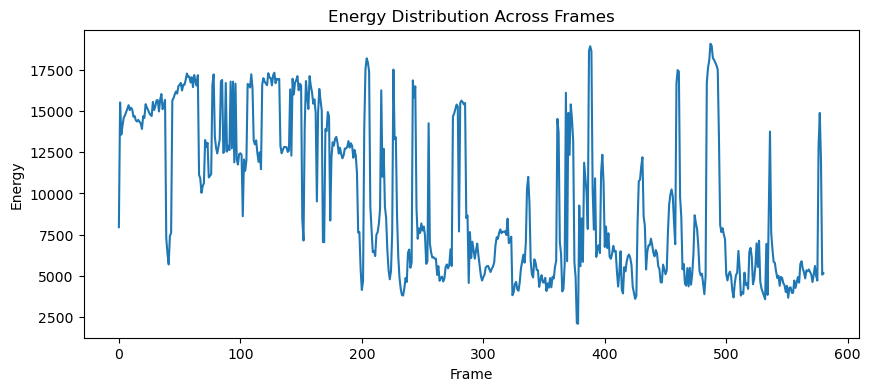

In [30]:
import matplotlib.pyplot as plt
frame_energies = np.sum(full_length_track, axis=0)

# Plot the energy distribution
plt.figure(figsize=(10, 4))
plt.plot(frame_energies)
plt.title('Energy Distribution Across Frames')
plt.xlabel('Frame')
plt.ylabel('Energy')
plt.show()

In [31]:
def find_optimal_threshold(energies, multiplier=1.5):
    mean_energy = np.mean(energies)
    std_energy = np.std(energies)
    threshold = mean_energy + multiplier * std_energy
    return threshold

# Determine optimal threshold
optimal_threshold = find_optimal_threshold(frame_energies)
print(f"Optimal energy threshold: {optimal_threshold}")

# Detect activity based on the optimal threshold
def detect_activity(track, threshold):
    activity_indices = np.where(np.sum(track, axis=0) > threshold)[0]
    return activity_indices

activity_indices = detect_activity(full_length_track, optimal_threshold)
print(f"Activity indices: {activity_indices}")

Optimal energy threshold: 16757.806499344522
Activity indices: [ 55  56  57  58  60  62  63  65  78  84  85  92  94 109 119 120 123 124
 125 127 128 130 131 132 143 146 147 154 157 203 204 205 206 226 242 387
 388 389 460 461 485 486 487 488 489 490 491 492 493]


In [32]:
def extract_segments(track, indices, segment_length=44):
    segments = []
    for idx in indices:
        start = max(0, idx - segment_length // 2)
        end = start + segment_length
        if end > track.shape[1]:
            end = track.shape[1]
            start = end - segment_length
        segment = track[:, start:end]
        if segment.shape[1] < segment_length:
            segment = np.pad(segment, ((0, 0), (0, segment_length - segment.shape[1])), 'constant')
        segments.append(segment)
    return np.array(segments)

segments = extract_segments(full_length_track, activity_indices)
print(f"Extracted segments shape: {segments.shape}")

Extracted segments shape: (49, 175, 44)


In [34]:
from sklearn.preprocessing import StandardScaler

# Load the scaler used during training
scaler = StandardScaler()

# Standardize each segment
standardized_segments = np.array([scaler.fit_transform(segment) for segment in segments])

# Reshape for model input
standardized_segments = standardized_segments.reshape(standardized_segments.shape[0], standardized_segments.shape[2], 1)
print(f"Standardized segments shape: {standardized_segments.shape}")


ValueError: cannot reshape array of size 377300 into shape (49,44,1)

In [ ]:
model_path_improved = r"C:\Users\azatv\Jupyter\JupyterProjects\ML and PC\improved_cnn_model.keras"

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

# Add LSTM layer
model.add(LSTM(100, activation='tanh', recurrent_activation='sigmoid', return_sequences=True))
model.add(LSTM(100, activation='tanh', recurrent_activation='sigmoid'))

# Add a dense layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(y_onehot.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 172, 64)           256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 86, 64)           0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 86, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 86, 100)           66000     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                      

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, BatchNormalization, Activation, Add, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def residual_block(x, filters, kernel_size):
    shortcut = x
    x = Conv1D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv1D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    return x

input_shape = (X_train.shape[1], X_train.shape[2])
inputs = Input(shape=input_shape)

x = Conv1D(64, kernel_size=3, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.2)(x)

x = Conv1D(128, kernel_size=3, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.2)(x)

# Adding Residual Blocks
x = residual_block(x, filters=128, kernel_size=3)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.2)(x)

x = residual_block(x, filters=128, kernel_size=3)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.2)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(y_onehot.shape[1], activation='softmax')(x)

model = Model(inputs, outputs)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 174, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 174, 64)      256         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 174, 64)     256         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 174, 64)      0           ['batch_normalization[0][0]']